This is a project aiming to predict the number of students enrolled in a college monthly.
The dataset consists of students enrolled from 2019 August to 2022 October.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_excel (r'C:\Users\PRINCIPAL\Desktop\COLLEGE DATA.xls') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
df.head()

Gender Foreign Student?       City   Country  \
0    Male               No  KITENGELA     Kenya   
1    Male               No     KIAMBU     Kenya   
2    Male               No   JOGOO RD     Kenya   
3  Female              Yes      KAREN  Tanzania   
4  Female               No    MATHARE     Kenya   

                                      Student Course           Admission Date  
0         [CERTIFICATE AIR CARGO INTRODUCTORY(IATA)]  2022-10-13 16:39:46.711  
1        [DIPLOMA ELECTRICAL AND ELECTRONICS (KNEC)]   2022-10-13 12:37:12.76  
2            [CERT HOTEL & CATERING MANAGEMENT(ICM)]  2022-10-13 11:01:32.172  
3             [DIPLOMA AIR CARGO INTRODUCTORY(IATA)]  2022-10-12 12:33:45.342  
4  [COMPUTERIZED DIPLOMA IN CUSTOMS ,CLEARING & F...  2022-10-12 12:11:21.283

In [3]:
#checking the columns in the dataset
df.columns

Index(['Gender', 'Foreign Student?', 'City', 'Country', 'Student Course',
       'Admission Date'],
      dtype='object')

In [4]:
#Getting the missing data
df.isnull().any()

Gender              True
Foreign Student?    True
City                True
Country             True
Student Course      True
Admission Date      True
dtype: bool

<AxesSubplot:>

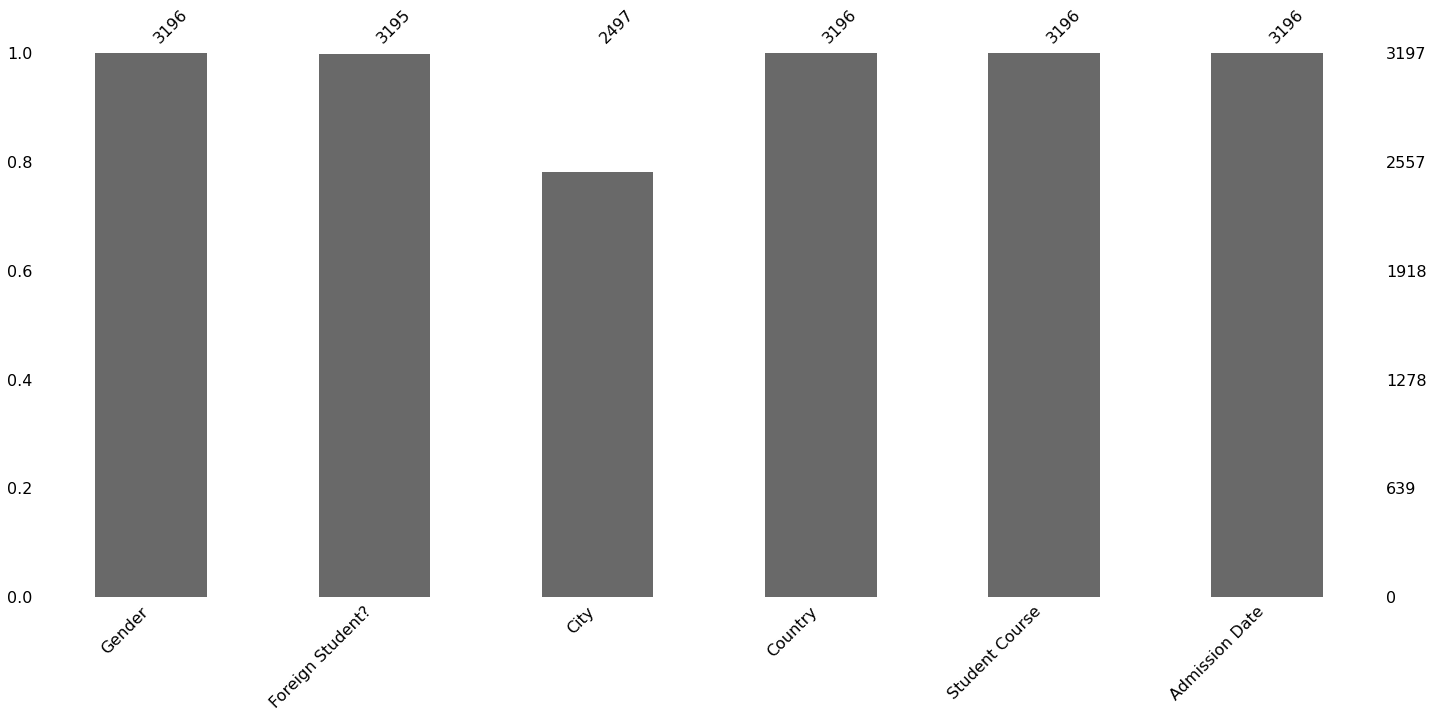

In [5]:
#visualizing missing data
import missingno as msno
msno.bar(df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

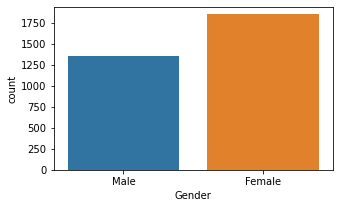

In [6]:
#plotting a gender countplot
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=df)

In [7]:
#Number of foreign students admitted
foreigners = (df['Foreign Student?']) .value_counts()
foreigners

No     3024
Yes     171
Name: Foreign Student?, dtype: int64

In [8]:
#droping irrelevant columns
df.drop(['Gender','City', 'Country','Foreign Student?', 'Student Course'],axis=1,inplace=True)
df.head()

Admission Date
0  2022-10-13 16:39:46.711
1   2022-10-13 12:37:12.76
2  2022-10-13 11:01:32.172
3  2022-10-12 12:33:45.342
4  2022-10-12 12:11:21.283

In [9]:
#making a copy of df so as to use the copy instead of the original 
df1= df.copy()
df1.head()

Admission Date
0  2022-10-13 16:39:46.711
1   2022-10-13 12:37:12.76
2  2022-10-13 11:01:32.172
3  2022-10-12 12:33:45.342
4  2022-10-12 12:11:21.283

In [10]:
#converting df1 to datetime and assigning new columns
df1['Admission Date']= pd.to_datetime(df1['Admission Date'])
df1['year']=df1['Admission Date'].dt.year
df1['month']=df1['Admission Date'].dt.strftime('%b')
df1['day']=df1['Admission Date'].dt.day
df1['hour']=df1['Admission Date'].dt.hour
df1['minute']=df1['Admission Date'].dt.minute
df1['second']=df1['Admission Date'].dt.second
df1['microsecond']=df1['Admission Date'].dt.microsecond
df1.head()

Admission Date    year month   day  hour  minute  second  \
0 2022-10-13 16:39:46.711  2022.0   Oct  13.0  16.0    39.0    46.0   
1 2022-10-13 12:37:12.760  2022.0   Oct  13.0  12.0    37.0    12.0   
2 2022-10-13 11:01:32.172  2022.0   Oct  13.0  11.0     1.0    32.0   
3 2022-10-12 12:33:45.342  2022.0   Oct  12.0  12.0    33.0    45.0   
4 2022-10-12 12:11:21.283  2022.0   Oct  12.0  12.0    11.0    21.0   

   microsecond  
0     711000.0  
1     760000.0  
2     172000.0  
3     342000.0  
4     283000.0

In [11]:
#dropping unwanted columns
df1.drop(['Admission Date','hour', 'minute','second', 'microsecond'],axis=1,inplace=True)
df1.head()

year month   day
0  2022.0   Oct  13.0
1  2022.0   Oct  13.0
2  2022.0   Oct  13.0
3  2022.0   Oct  12.0
4  2022.0   Oct  12.0

In [12]:
#renaming column day to enrollment
df1.rename(columns = {list(df1)[2]:'enrollment'}, inplace=True)

In [13]:
#making a copy of df1
df2=df1.copy()
df2.head()

year month  enrollment
0  2022.0   Oct        13.0
1  2022.0   Oct        13.0
2  2022.0   Oct        13.0
3  2022.0   Oct        12.0
4  2022.0   Oct        12.0

In [14]:
#checking for missing values
df2.isnull().sum()

year          1
month         1
enrollment    1
dtype: int64

In [15]:
#dropping missing values
df2.dropna(inplace=True)

In [16]:
#grouping by year and month to get the number of enrollments per month
df3=df2.groupby(['year','month'],as_index=False)\
.agg({'enrollment':'count'})
df3

year month  enrollment
0   2019.0   Aug         134
1   2019.0   Dec          18
2   2019.0   Jul          98
3   2019.0   Nov          27
4   2019.0   Oct          76
5   2019.0   Sep         212
6   2020.0   Dec          21
7   2020.0   Feb         131
8   2020.0   Jan         257
9   2020.0   Jul           4
10  2020.0   Mar          58
11  2020.0   Nov          35
12  2020.0   Oct          25
13  2020.0   Sep           4
14  2021.0   Apr           6
15  2021.0   Aug          82
16  2021.0   Dec          13
17  2021.0   Feb         102
18  2021.0   Jan         178
19  2021.0   Jul          59
20  2021.0   Jun          57
21  2021.0   Mar          70
22  2021.0   May          58
23  2021.0   Nov          48
24  2021.0   Oct          72
25  2021.0   Sep         221
26  2022.0   Apr          43
27  2022.0   Aug          72
28  2022.0   Feb         101
29  2022.0   Jan         212
30  2022.0   Jul          55
31  2022.0   Jun          94
32  2022.0   Mar          56
33  2022.0   May         156
34  2022.0   Oct          56
35  2022.0   Sep         285

In [17]:
#converting column year to int to remove the decimal point
df3['year']=df3['year'].astype(int)
df3

year month  enrollment
0   2019   Aug         134
1   2019   Dec          18
2   2019   Jul          98
3   2019   Nov          27
4   2019   Oct          76
5   2019   Sep         212
6   2020   Dec          21
7   2020   Feb         131
8   2020   Jan         257
9   2020   Jul           4
10  2020   Mar          58
11  2020   Nov          35
12  2020   Oct          25
13  2020   Sep           4
14  2021   Apr           6
15  2021   Aug          82
16  2021   Dec          13
17  2021   Feb         102
18  2021   Jan         178
19  2021   Jul          59
20  2021   Jun          57
21  2021   Mar          70
22  2021   May          58
23  2021   Nov          48
24  2021   Oct          72
25  2021   Sep         221
26  2022   Apr          43
27  2022   Aug          72
28  2022   Feb         101
29  2022   Jan         212
30  2022   Jul          55
31  2022   Jun          94
32  2022   Mar          56
33  2022   May         156
34  2022   Oct          56
35  2022   Sep         285

<AxesSubplot:xlabel='month', ylabel='enrollment'>

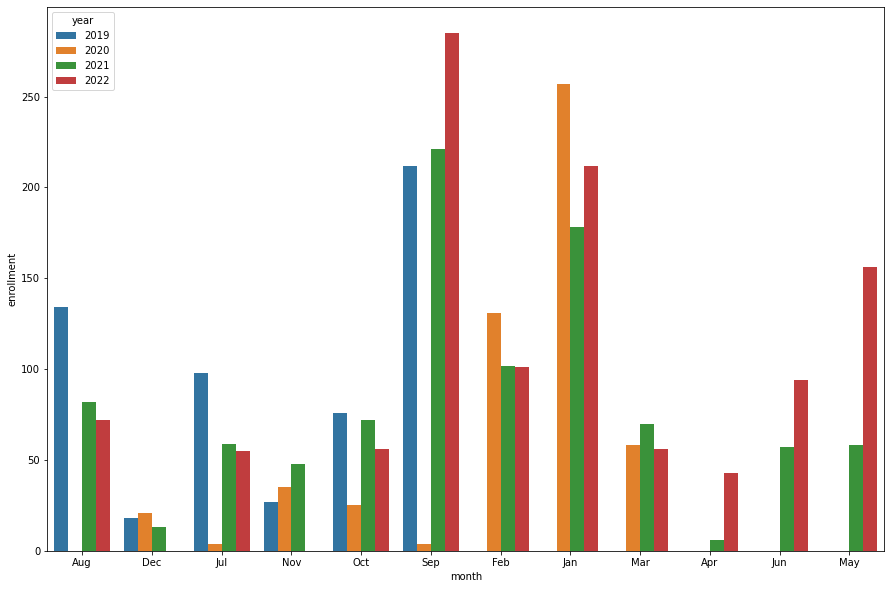

In [18]:
#visualizing enrollment numbers across the different months in the 4 years
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='month',y='enrollment',hue='year',data=df3)


In [19]:
#importing the ml libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [20]:
#Dummy encoding the remaining categorical object columns
dataset=pd.get_dummies(df3, columns = ['month'],dtype = 'int8')
dataset

year  enrollment  month_Apr  month_Aug  month_Dec  month_Feb  month_Jan  \
0   2019         134          0          1          0          0          0   
1   2019          18          0          0          1          0          0   
2   2019          98          0          0          0          0          0   
3   2019          27          0          0          0          0          0   
4   2019          76          0          0          0          0          0   
5   2019         212          0          0          0          0          0   
6   2020          21          0          0          1          0          0   
7   2020         131          0          0          0          1          0   
8   2020         257          0          0          0          0          1   
9   2020           4          0          0          0          0          0   
10  2020          58          0          0          0          0          0   
11  2020          35          0          0          0          0          0   
12  2020          25          0          0          0          0          0   
13  2020           4          0          0          0          0          0   
14  2021           6          1          0          0          0          0   
15  2021          82          0          1          0          0          0   
16  2021          13          0          0          1          0          0   
17  2021         102          0          0          0          1          0   
18  2021         178          0          0          0          0          1   
19  2021          59          0          0          0          0          0   
20  2021          57          0          0          0          0          0   
21  2021          70          0          0          0          0          0   
22  2021          58          0          0          0          0          0   
23  2021          48          0          0          0          0          0   
24  2021          72          0          0          0          0          0   
25  2021         221          0          0          0          0          0   
26  2022          43          1          0          0          0          0   
27  2022          72          0          1          0          0          0   
28  2022         101          0          0          0          1          0   
29  2022         212          0          0          0          0          1   
30  2022          55          0          0          0          0          0   
31  2022          94          0          0          0          0          0   
32  2022          56          0          0          0          0          0   
33  2022         156          0          0          0          0          0   
34  2022          56          0          0          0          0          0   
35  2022         285          0          0          0          0          0   

    month_Jul  month_Jun  month_Mar  month_May  month_Nov  month_Oct  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           1          0          0          0          0          0   
3           0          0          0          0          1          0   
4           0          0          0          0          0          1   
5           0          0          0          0          0          0   
6           0          0          0          0          0          0   
7           0          0          0          0          0          0   
8           0          0          0          0          0          0   
9           1          0          0          0          0          0   
10          0          0          1          0          0          0   
11          0          0          0          0          1          0   
12          0          0          0          0          0          1   
13          0          0          0          0          0          0   


In [21]:
#identifying the columns in the new dataset
dataset.columns


Index(['year', 'enrollment', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [22]:
#Setting up the features and labels
x= dataset[['year','month_Apr', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep' ]].values
y = dataset['enrollment'].values

In [23]:
#transforming x values 
scaler = StandardScaler()
x = scaler.fit_transform(x).reshape(-1,1)
y=scaler.fit_transform(x).reshape(-1,1)

In [24]:
#Spliting features and labels for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [25]:
#calling mls and fitting x,y values for training and predictions
regr = LinearRegression(n_jobs=-1)

regr.fit(x_train, y_train)

regression_line = regr.predict(x_train)
y_predict = regr.predict(x_test)

In [26]:
#scoring the model
r2_score(regression_line, y_train)

1.0

In [27]:
#scoring the model
r2_score(y_predict, y_test)

1.0

In [28]:
#predictions
y_predict

array([[-0.30151134],
       [-0.30151134],
       [-0.69192018],
       [-0.35355339],
       [ 3.31662479],
       [ 3.31662479],
       [-0.35355339],
       [-0.30151134],
       [-0.30151134],
       [-0.35355339],
       [-0.30151134],
       [-0.24253563],
       [-0.30151134],
       [ 2.82842712],
       [ 3.31662479],
       [-0.30151134],
       [-0.35355339],
       [-0.35355339],
       [-0.24253563],
       [-0.30151134],
       [-0.30151134],
       [ 3.31662479],
       [-0.69192018],
       [-0.24253563],
       [ 1.22416648],
       [-0.30151134],
       [-0.30151134],
       [-0.30151134],
       [-0.30151134],
       [ 2.82842712],
       [-0.30151134],
       [-0.24253563],
       [ 1.22416648],
       [-0.69192018],
       [ 0.26612315],
       [-0.30151134],
       [-0.24253563],
       [-0.35355339],
       [-1.64996352],
       [-0.30151134],
       [-0.30151134],
       [-0.35355339],
       [ 0.26612315],
       [-0.30151134],
       [-0.30151134],
       [-0

In [29]:
#Merging results from regr.predict() with original pandas DataFrame
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

Actual  Predicted
0  -0.301511  -0.301511
1  -0.301511  -0.301511
2  -0.691920  -0.691920
3  -0.353553  -0.353553
4   3.316625   3.316625
..       ...        ...
89 -0.301511  -0.301511
90 -0.691920  -0.691920
91 -0.301511  -0.301511
92 -0.353553  -0.353553
93 -0.242536  -0.242536

[94 rows x 2 columns]